In [1]:
# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import CSV file

In [4]:
raw_material = pd.read_csv(r'\Users\rhayes\Desktop\UCD_Data_Analytics_Course\HEA_Student_Enrolment_Data_Domicilary_Origin_201819.csv')

In [5]:
raw_material.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
0,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
1,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow,NaN
2,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow,NaN
3,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin,NaN
4,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow,NaN


In [ ]:
# IMPORT AND DEVELOP CLEAN SET OF DATA FOR COUNTY POPULATIONS 

In [7]:
# Scrap data 

In [8]:
scraped_data=pd.read_html("https://citypopulation.de/en/ireland/towns/")

In [9]:
print(len(scraped_data))

2


In [10]:
County_Populations=scraped_data[0]

In [11]:
County_Populations.head()

,Name,Status,PopulationCensus1991-04-21,PopulationCensus1996-04-28,PopulationCensus2002-04-28,PopulationCensus2006-04-23,PopulationCensus2011-04-10,PopulationCensus2016-04-24,Unnamed: 8
0,Carlow,County,40942,41616,46014,50349,54612,56932,→
1,Cavan,County,52796,52944,56546,64003,73183,76176,→
2,Clare,County,90918,94006,103277,110950,117196,118817,→
3,Cork,County,...,...,...,...,319494,333213,→
4,Cork City,City,...,...,...,...,199538,209655,→


In [12]:
# Only include most recent census information (2016)

In [13]:
County_Populations2016=County_Populations.drop(
    ["PopulationCensus1991-04-21", "PopulationCensus1996-04-28", "PopulationCensus2002-04-28", "PopulationCensus2006-04-23", "PopulationCensus2011-04-10", "Unnamed: 8"],
    axis=1)

In [14]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24
0,Carlow,County,56932
1,Cavan,County,76176
2,Clare,County,118817
3,Cork,County,333213
4,Cork City,City,209655
5,Donegal,County,159192
6,Dublin City,City,554554
7,Dún Laoghaire-Rathdown,County,218018
8,Fingal,County,296020
9,Galway,County,179390


In [15]:
# Tidy up Dublin, Cork and Galway populations 

In [16]:
def TidyCountyPop(County_Populations2016): 
    if County_Populations2016 ["Name"] in ["Fingal", "Dublin City", "Dún Laoghaire-Rathdown", "South Dublin"]:
        return "Dublin"
    elif County_Populations2016 ["Name"] in ["Cork City"]:
        return "Cork"
    elif County_Populations2016 ["Name"] in ["Galway City"]:
        return "Galway"
    elif County_Populations2016 ["Name"] in ["Laois (Laoighis)"]:
        return "Laois"
    else:
        return County_Populations2016 ["Name"]


In [17]:
County_Populations2016["New Name"]=County_Populations2016.apply (TidyCountyPop, axis=1)
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
9,Galway,County,179390,Galway


In [18]:
County_Populations2016 = County_Populations2016.sort_values("New Name")

In [19]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
25,South Dublin,County,278767,Dublin


In [37]:
County_Populations2016=County_Populations2016.groupby("New Name").sum(["Dublin", "Cork", "Galway"]).reset_index()

In [38]:
County_Populations2016

,New Name,PopulationCensus2016-04-24
0,Carlow,56932
1,Cavan,76176
2,Clare,118817
3,Cork,542868
4,Donegal,159192
5,Dublin,1347359
6,Galway,258058
7,Ireland (Éire),4761865
8,Kerry,147707
9,Kildare,222504


In [39]:
# Generate DF1: Overall HE-going population in Ireland, by County

In [72]:
student_population = raw_material.groupby ( ["County"]) ["Number of Students"].agg(sum) # This is the number of students attending higher education from each county

In [65]:
student_population.reset_index() # This is the population of students attending HE in Ireland by County

,County,Number of Students
0,Antrim (including Belfast),396
1,Armagh,100
2,Carlow,2763
3,Cavan,2870
4,Clare,5746
5,Cork,25397
6,Derry,255
7,Donegal,6420
8,Down,399
9,Dublin (including postal districts),49026


In [66]:
student_population.sum() # Total number of students in HE in Ireland 

201626

# GOT THIS FAR

In [109]:
if student_population ("County") in ("Dublin(including postal districts)"):
    return "Dublin"

SyntaxError: 'return' outside function (<ipython-input-109-6dc6c41fad47>, line 2)

<AxesSubplot:xlabel='County'>

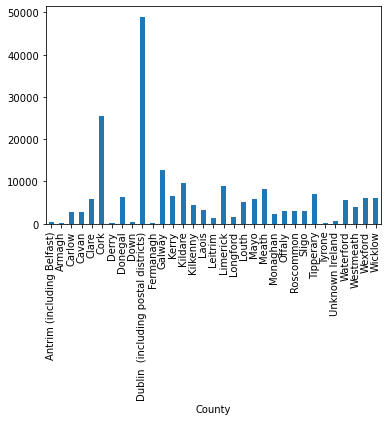

In [82]:
student_population.plot(kind="bar") #Plots out the overall shape of the student population

In [ ]:
# Merge County and Student Population Information to get a Patricipation Rate 

In [78]:
merged_population_counties = student_population.merge (County_Populations2016, left_on="County", right_on="New Name", how="right")

AttributeError: 'Series' object has no attribute 'merge'

In [77]:
merged_population_counties 

,New Name,PopulationCensus2016-04-24,Number of Students
0,Carlow,56932,2763.0
1,Cavan,76176,2870.0
2,Clare,118817,5746.0
3,Cork,542868,25397.0
4,Donegal,159192,6420.0
5,Dublin,1347359,NaN
6,Galway,258058,12808.0
7,Ireland (Éire),4761865,NaN
8,Kerry,147707,6452.0
9,Kildare,222504,9676.0


In [60]:
merged_population_counties.dropna()

,New Name,PopulationCensus2016-04-24,Number of Students
2,Carlow,56932.0,2763
3,Cavan,76176.0,2870
4,Clare,118817.0,5746
5,Cork,542868.0,25397
7,Donegal,159192.0,6420
11,Galway,258058.0,12808
12,Kerry,147707.0,6452
13,Kildare,222504.0,9676
14,Kilkenny,99232.0,4443
15,Laois,84697.0,3126


In [61]:
merged_population_counties ["Percentage Attending Third Level"] = merged_population_counties ["PopulationCensus2016-04-24"]/ merged_population_counties ["Number of Students"]

In [62]:
merged_population_counties=merged_population_counties.dropna()

In [63]:
merged_population_counties.plot(x="New Name", y="Percentage Attending Third Level", kind="bar")

KeyError: 'Name'

In [44]:
# Isolate HE-going Population from SE

In [50]:
SE_student_population=isolateSE2.groupby ("County").sum().reset_index()

In [45]:
raw_material_ind=raw_material.set_index ("County")

In [46]:
isolateSE1=raw_material_ind.loc[ ["Waterford", "Wexford", "Carlow", "Kilkenny"]]

In [47]:
isolateSE2=isolateSE1.sort_values("Institute New Combined")

In [48]:
isolateSE2.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
Wexford,1,2018/2019,Ireland,(0923) Social work and counselling,Athlone IT
Wexford,1,2018/2019,Ireland,"(1013) Hotel, restaurants and catering",Athlone IT
Wexford,5,2018/2019,Ireland,(1014) Sports,Athlone IT
Carlow,1,2018/2019,Ireland,(0410) Business and administration not further...,Athlone IT
Carlow,1,2018/2019,Ireland,(0411) Accounting and taxation,Athlone IT


In [51]:
print(SE_student_population) #This is the number of students from each County in the SE attending Higher Education 

      County  Number of Students
0     Carlow                2763
1   Kilkenny                4443
2  Waterford                5490
3    Wexford                6149


In [ ]:
raw_material_ind.sort_index()

In [ ]:
raw_material_ind.sort_index(level=["County", "Number of Students"])

In [ ]:
WD_student.head()

In [ ]:
WD_student2=WD_student.groupby (["Institute New Combined"]) ["Number of Students"]. sum()
WD_student2.plot (kind="bar", rot=90)
plt.show()

In [ ]:
WD_student3=WD_student.sort_values("Institute New Combined")
WD_student_excludeWIT=WD_student3[~WD_student3 ["Institute New Combined"].isin("Waterford IT")]


In [ ]:
raw_material.head()

In [ ]:
raw_material_ind=raw_material.set_index("County")

In [ ]:
raw_material_ind.head()

In [ ]:
raw_material_ind.isna()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material.isna().any()

In [ ]:
raw_material_ind.reset_index()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material_ind.sort_values("Number of Students", ascending=False)

In [ ]:
raw_material_ind.sort_values("County", ascending=True)

raw_material_ind.groupby("Institute New Combined) ["Number of Students"]. sum()

In [ ]:
most_populace_colleges=raw_material_ind.groupby("Institute New Combined") ["Number of Students"].sum()

In [ ]:
most_populace_colleges.head()

In [ ]:
most_populace_colleges.hist()

In [ ]:
most_populace_colleges.plot(x="Institute New Combined", kind="bar", rot=90)

In [ ]:
most_populace_colleges.head()

In [ ]:
SE_colleges = most_populace_colleges ("Institute New Combined" ["Carlow", "Kilkenny"])

In [ ]:
SE_counties_students = (raw_material ["County"]==["Carlow"])